Lab Assignment 3 Part 1 Members 

1. Darren Ang <br>
2. Harsh Kagda <br>
3. Jonathan Hilton <br>
4. Keith Wertsching <br>
5. Nicole Yoon


## Introduction

The 2013 film The Purge, though fictional and riddled with plot holes, unintentionally addresses a topic that often goes un-discussed in the political arena: What would happen if laws were erased and all crime became legal? One would assume that human beings would still have enough innate compassion to avoid killing each other, but many cases in history have demonstrated humanity's ability to act purely out of emotion and completely disregard social norms.  But is it the simple fact that certain actions are against the law that deter citizens from committing crimes, or is another layer of implication necessary to deter people from heinous actions? Modern research tends to agree with the latter idea, that the certainty and severity of punishment are critical to detering people from a life of crime.  Our research sets out to answer the question: "To what extent does the probability of getting caught and the severity of the punishment reduce the crime rate in the North Carolina counties that have the highest percentage mix of face to face crimes?"

The result of our analysis is going to demonstrate effectiveness of two policies that are central to our campaign's crime reduction initiative:

1. Empowering police officers to build a network of citizens in their community who can help the officers find those responsible for committing crimes and increasing the probability that the perpetrators will be arrested.
2. Harshening the punishments for repeat offenders by increasing the average sentences they receive in an effort to deter criminals from continuing to break the law.



## Initial Data Loading and Cleaning

The data is comprised of 25 metrics gathered for 91 counties from the state of North Carolina. Upon import, we noticed that there were 97 rows instead of the expected 91.  Looking further into, the dataset had 6 extra rows that were all NA values. We removed these rows to create a subset of data that only included the 91 relevant datapoints.

In [21]:
library(car)
library(lmtest)
library(sandwich)
library(stargazer)

df = read.csv('crime_v2.csv')
str(df)
summary(df)
sum(is.na(df))
nrow(df)
df = na.omit(df)
sum(is.na(df))
nrow(df)
summary(df$su)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

[1] 144

[1] 97

[1] 0

[1] 91

Length  Class   Mode 
     0   NULL   NULL 

Next, we took a look at the variables given to us to determine whether or not we needed to adjust any for numeric values.  One variable that we noticed needed to be modified was the probability of conviction.  Converting this attribute to a numeric value will allow us to perform further analysis on it later on.

In [3]:
#Need to convert conviction rate into numerics
df$prbconv2 = as.numeric(df$prbconv)

After examining type, we examined each attribute for obvious outliers.  The first one we found was on the average weekly wage for service industry workers, with one county	at 2177.1. Considering that the max average wage across all industries did not exceed 1000 anywhere else, we decided to not include this county in the dataset.

The next outlier that we found was on the probability of arrest, which measures that likelihood that someone will be arrested after they have committed a crime. This metric should logically never exceed 100%, which is the circumstance where every crime committed is met with an arrest. We decided to omit the county that had above 100% probability of arrest in order to avoid contaminating our results.

Tax revenue per capita had a mean of 38.06 and a max of 119.76.  Considering that the next highest value was 75.76, we decided to not include the county that had the outlier value on Tax Revenue per capita.

Finally, we decided to have our analysis focus on the counties that have the highest percentage mix of face to face crime in an effort to have our results highlight what can be done to combat the crimes that have the greatest impact on society.  In order to achieve this, we are going to limit our subset to those counties that have a face to face crime percentage mix above 12%, which represents 33 counties that have the greatest opportunity to reduce society's most harmful crimes.

In [22]:
# Removed outlier on wser, removed prbarr above 1, remove outlier on tax pc)
df = subset(df, wser < 2000 & prbarr < 1 & taxpc <100 & mix >= 0.10186)
nrow(df)
summary(df)

[1] 46

     county           year        crmrte            prbarr      
 Min.   :  5.0   Min.   :87   Min.   :0.01192   Min.   :0.1461  
 1st Qu.: 53.0   1st Qu.:87   1st Qu.:0.02060   1st Qu.:0.2548  
 Median :113.0   Median :87   Median :0.03000   Median :0.3144  
 Mean   :105.4   Mean   :87   Mean   :0.03279   Mean   :0.3264  
 3rd Qu.:156.5   3rd Qu.:87   3rd Qu.:0.03718   3rd Qu.:0.3804  
 Max.   :195.0   Max.   :87   Max.   :0.09897   Max.   :0.6890  
                                                                
        prbconv      prbpris           avgsen           polpc          
 0.588859022: 2   Min.   :0.1500   Min.   : 5.450   Min.   :0.0007559  
 0.068376102: 1   1st Qu.:0.3781   1st Qu.: 7.312   1st Qu.:0.0012378  
 0.203724995: 1   Median :0.4274   Median : 8.795   Median :0.0014483  
 0.226361006: 1   Mean   :0.4149   Mean   : 9.331   Mean   :0.0016275  
 0.229589999: 1   3rd Qu.:0.4576   3rd Qu.:11.098   3rd Qu.:0.0018610  
 0.248275995: 1   Max.   :0.6000   Max.   :14.62

Loading required package: carData


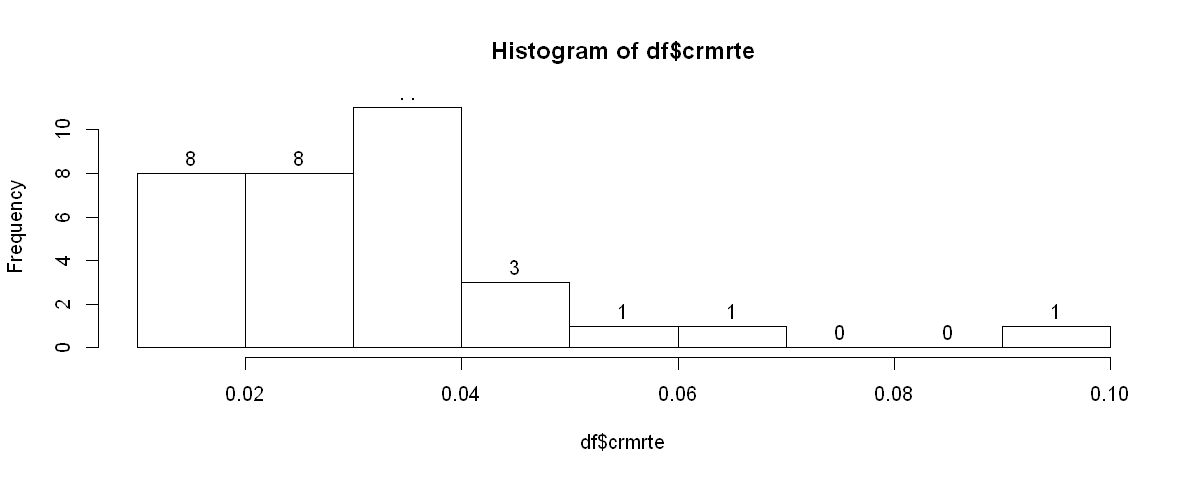

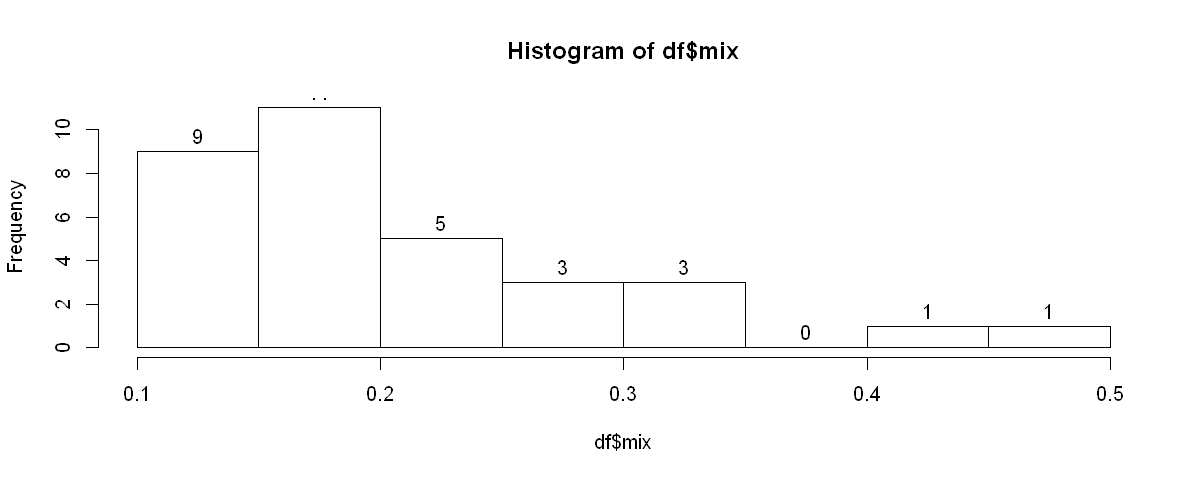

In [6]:
library("car")
options(repr.plot.width=10, repr.plot.height=4)
hist(df$crmrte, labels = TRUE)
hist(df$mix, labels = TRUE)

## Model Development
After going through the EDA analysis and cleansing the data, we were then ready to move on to our model development.  Prior to creating a linear model we started by thinking about the variables most in influenced by policy making.  Therefore, our initial hypthosis was that taxes per capita (taxpc), police per capita (polpc), and wages of local officials (polpc) would be key determinants in crime and we could create a tax and police force funding policy initiative.  Another key aspect of our model building was to focus on the crime rate (crmrte) as the dependent variable to test other variables as determiants in crime.   

We used the scatterplotMatrix from the car library to quickly assess and view potential relationships between other variables and the crime rate (crmrte).   To do this, we simply set the crime rate variable (crmrte) as the first variable in each scatterplotMatrix so that the first row will always show the relationship of any independent variable to dependent variable crime rate.  The analysis can be seen below:

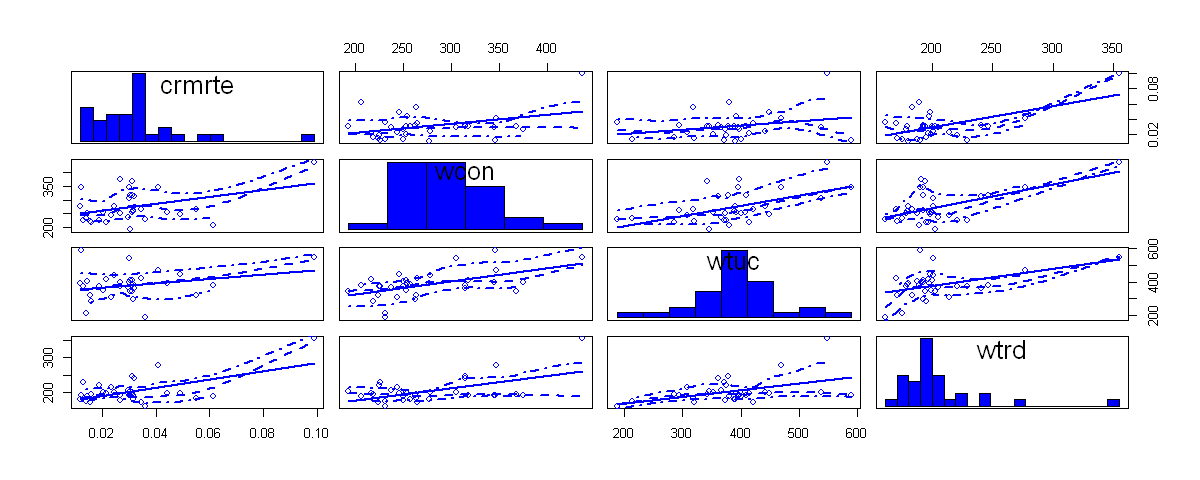

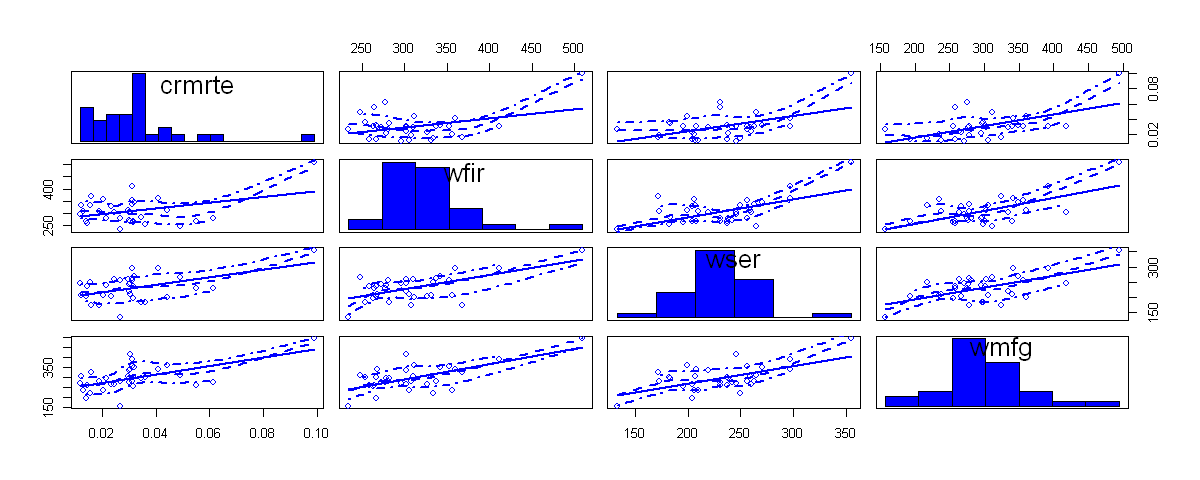

In [18]:
library("car")
scatterplotMatrix(~crmrte + wcon + wtuc + wtrd, data = df, diagonal = list(method = "histogram"))
scatterplotMatrix(~crmrte + wfir + wser + wmfg, data = df, diagonal = list(method = "histogram")) 

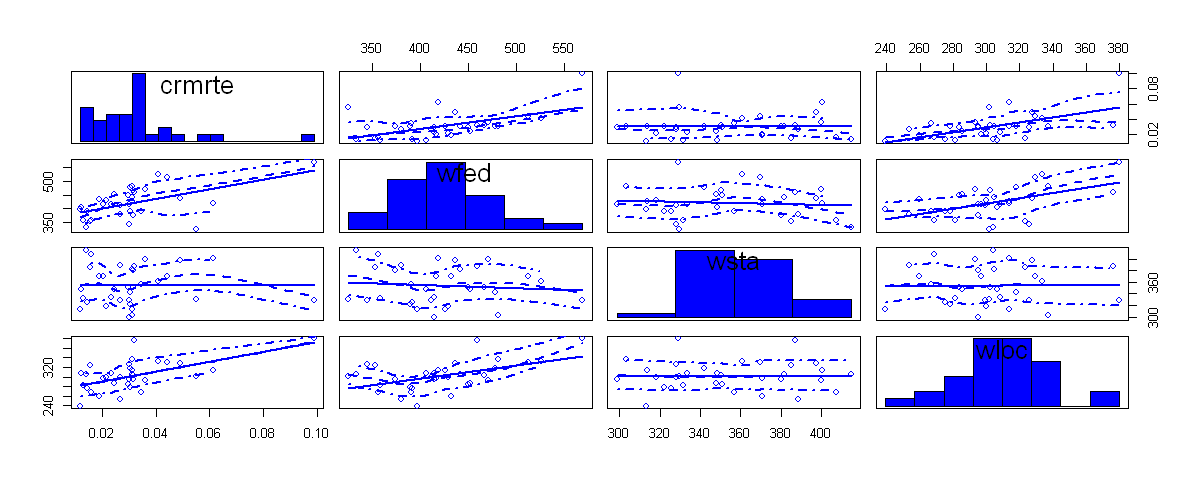

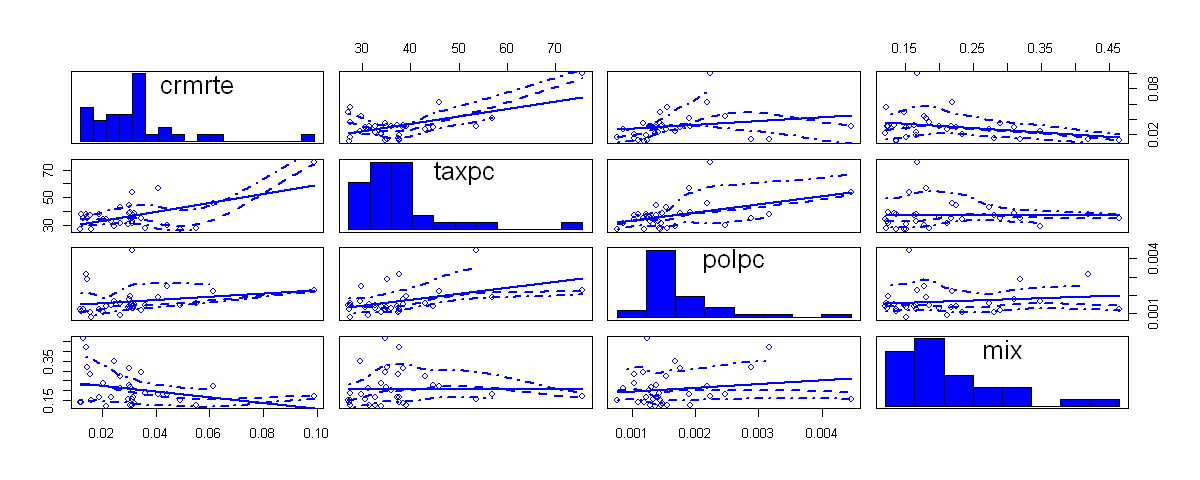

In [19]:
scatterplotMatrix(~crmrte + wfed + wsta + wloc, data = df, diagonal = list(method = "histogram"))
scatterplotMatrix(~crmrte + taxpc + polpc + mix, data = df, diagonal = list(method = "histogram"))

[1] "Note probconv2 is the numeric version of the variable probconv"

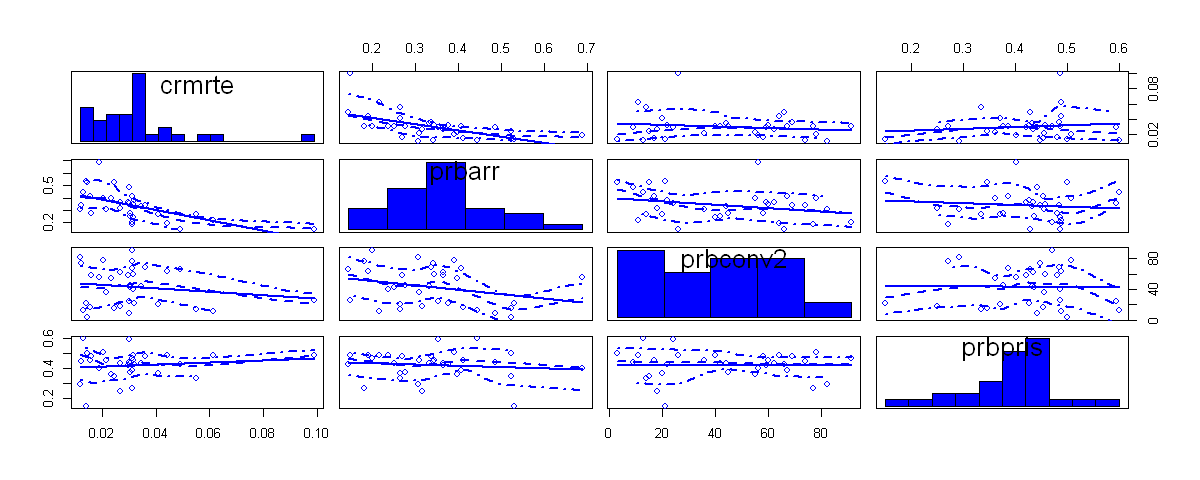

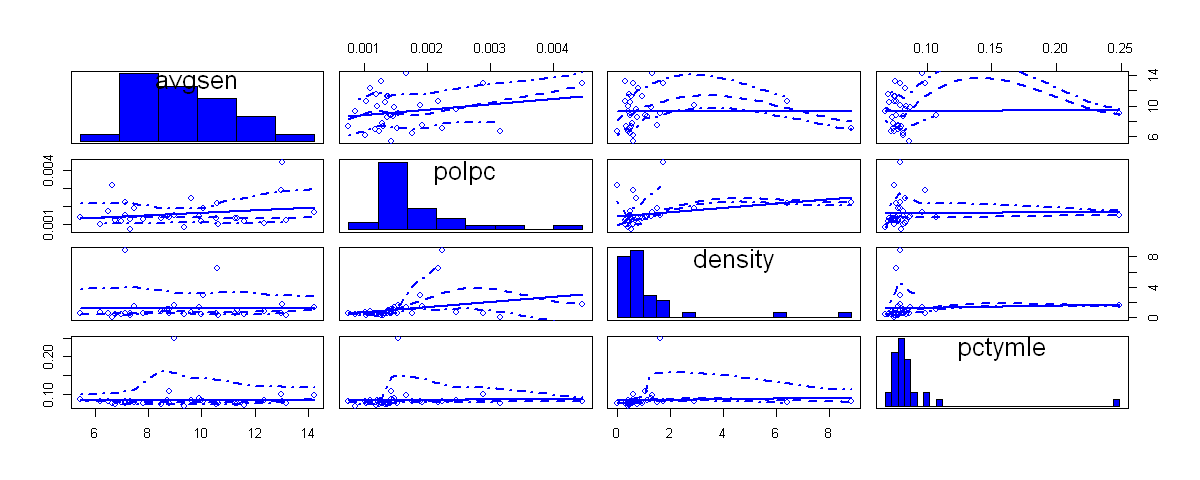

In [20]:
scatterplotMatrix(~crmrte + prbarr + prbconv2 + prbpris, data = df, diagonal = list(method = "histogram"))
paste("Note probconv2 is the numeric version of the variable probconv")
scatterplotMatrix(~avgsen + polpc + density + pctymle, data = df, diagonal = list(method = "histogram"))

## Initial Model Building Analysis
When it came to wages it appeared that crime rates go up with higher wages.  Specifically, when we looked at federal, state, and local government wages it was surprising to see that crime goes up as wages go up.  Again, our initial hypothesis was that higher local government wages would translate into higher wages for law enforcement and therefore lower crime rates with a better funded police staff.  
Additionally, the tax per capita and police per capita also did not seem to move the crime rate any lower.  This was also not in line with our initial hypothesis.
Finally, the impacts of probability of arrenst and probability of conviction have a strong relationship to a decreasing crime rate.  
For the sake of our initial hypothesis, we did run a model under our initial hypothesis with crime rate against tax per capita and police per capita.

## Model Discussion Continued
Again, we tried to at least see what kind of model our initial hypothesis resulted in and we see strong correlation in the coefficents, however not in the direction we had initially proposed.  We tried several subsets of other variables to see if this direction changed.  For instance looking at urban, non-urban, high crime rate counties, high face-to-face crime, west, percentage young male, and higher population density but the trend remained.  For the sake of brevity in this excercise, I have not listed all of those plots and subsets.   Suffice it to say, that many iterations of subsets were analyzed.

So, we honed on the crime and punishment side of the equation by focusing in on probability of arrest. We can now transition into the specifics of our regression models as we moved from regression Model #1 to #3. 

## Model Assumptions
For the sake of this excerices we will assume the following:  
We will use OLS as our best estimation method in our models and our $\hat{\beta_j}$ estimator is unbiased consistent witht he Gaus Markov theorem.  
We assume that the models are linear in parameters.  
We will assume that the sample of data was obtained from a radom (i.i.d.) sampling.  
We will assume that we have no perfect collinearity.  
We will assume we have a zero conditional mean.  



## Regression Model 1
As described above, we moved into probablity of arrest as our first key independent variable.  However, we wanted to find a way to be more specific with our focus for the sake of policy advocacy.  So, we started to look into what happens when the data is subsetted to focus on counties with higher than normal face to face crimes.

We saw that there was strengthing of the downward trend in crime rates based on probability of arrest and average sentencing as we looked at higher face-to-face crime counties.  Also, from a policy perspective we reasoned that the "perception" of high crime would be with those counties in which there was higher than average face-to-face crime.  The reasoning goes that a person is more likely to hear tales or feel personally troubled if confronted physically with a crime (either seeing it personally, on the tv, or being a victim).  These also seem to be more likely a crime involving violence.  So in our model, we wanted to focus our policy efforts on arrests in counties with higher than average face to face crime. 

What is interesting is that the mean crime rate actually goes down when we subset the data to only include counties with more face-to-face crimes mix.  We took this to be slightly below the average at 12% (mean of mix ~ .128) yet still higher than the median of 10%.  At a minumum, this allowed us to bring in 5 more counties for a total of 33 counties that we would otherwise have missed if we had taken the mean value and above.  What is interesting is that the mean for crime rate goes from .3340 to .3088 but the impact of arrest on driving crime rate down goes up.

Additionally, in order to better understand the impact of probability of arrest, we want to keep the police per capita constant so that the presence of more police does influence our probability of arrest impact on the crime rate.  This would mean that keeping police per capita constant, our coefficient for probability of arrest has that police per capita's impact to crime rate removed.  This is because we wanted to remove the bias that more police in a county results in more arrests.

Since we also have values that are based on per capita's and rates, we used a log-log approach to our model.  This way we can focus on the % increase in the crime rate as the % of probability of arrest and the % of the police per capita goes up.

Our basic model is as follows:

$log(crime rate) = \beta_0 \ + \ \beta_1 log(probability \ of \ arrest) \ + \ \beta_2 log(probability \ of \ conviction) \ + \ \beta_3 log(average \ sentence) $

In [8]:
library('stargazer')
model1a = lm(log(crmrte) ~ log(prbarr), data = df)
model1 = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen), data = df)
stargazer(model1a, model1, type = 'text', report = 'vc', title = "% Change in Crime Rate vs % Change in Prob of Arrest & Police per Capita",
         keep.stat = c('n', 'rsq'), omit.table.layout = 'n')
#scatterplot(log(crmrte) ~ log(prbarr) + log(avgsen), data = df, ylab = "% Change in Crime Rate", xlab = "% Change in Probability of Arrest and Average Sentence", main = "Regression Model 1:  
#% Change in Crime Rate vs % Change in Probability of Arrest and Average Sentence
#(Counties with Higher than Avg Face - To - Face Crimes)")


% Change in Crime Rate vs % Change in Prob of Arrest & Police per Capita
              Dependent variable: 
              --------------------
                  log(crmrte)     
                 (1)        (2)   
----------------------------------
log(prbarr)     -0.886    -0.983  
                                  
log(prbconv2)             -0.231  
                                  
log(avgsen)               -0.035  
                                  
Constant        -4.591    -3.819  
                                  
----------------------------------
Observations      46        46    
R2              0.377      0.507  


## Model 1 Analysis
This model appeared to have a strong assocation of decline in the crime rate based on increasing probability of arrests and police per capita.  The coefficeints of $\beta_1 \ = \ -.813$ for probability of arrest and $\beta_2 \ = \ .265$ for police per capita suggest a strong association.  Furthermore, the $R^2 \ = \ .456$ seems to suggest that these variables account for 45.6% of the percent change in the crime rate.

Also, these coefficients confirm our thinking that if police per capita is ommitted, it would over-estimate probability of arrest on moving crime rate closer to 0.

This starts to help form our conculusion on the policy reccomendations we might make regarding crime and arrests which we will address in the conclusion.

At the same time, we do want to know what happens in our model with addition of other covariates, especially if we want to hold other variables constant in our analysis.  This will lead us to Model #2

## Model 2 Analysis

In model 2, we included two additional variables which we believe will increase the accuracy of our results. We have included average sentence (avgsen) and 'probability of conviction (prbconv).

So our model 2 will be - 

𝑙𝑜𝑔(𝑐𝑟𝑖𝑚𝑒𝑟𝑎𝑡𝑒)= 𝛽0  + 𝛽1𝑙𝑜𝑔(𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 𝑜𝑓 𝑎𝑟𝑟𝑒𝑠𝑡) + 𝛽2𝑙𝑜𝑔(𝑝𝑜𝑙𝑖𝑐𝑒 𝑝𝑒𝑟 𝑐𝑎𝑝𝑖𝑡𝑎) + 𝛽3𝑙𝑜𝑔(average sentence) + 𝛽2𝑙𝑜𝑔(𝑝robability of conviction)

<br>

This model appeared to have a strong assocation of decline in the crime rate based on increasing probability of arrests, police per capita, average sentence and probability of conviction.  The coefficeints of $\beta_1 \ = \ -.88$ for probability of arrest, $\beta_2 \ = \ .23$ for police per capita and $\beta_3 \ = \ .25$  for average sentence days suggest a strong association.  Furthermore, the $R^2 \ = \ .497$ seems to suggest that these variables account for close to 50% of the percent change in the crime rate. 𝑅2  has increased from Model 1 but this can be attributed to addition of two more variables.

Also, these coefficients continue to confirm our thinking that if police per capita is ommitted, it would over-estimate probability of arrest on moving crime rate closer to 0. Continuing from Model 1, this helps our conculusion on the policy reccomendations we might make regarding crime and arrests which we will address in the conclusion.

We will also add additional variables to understand if any other variables help us understand better on our output variable. In Model 3, we will add few more variables which will help us solidify our conclusion.



In [9]:
model2 = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen)+ log(polpc)+log(taxpc), data = df)

summary(model2)$r.square

[1] 0.5603366

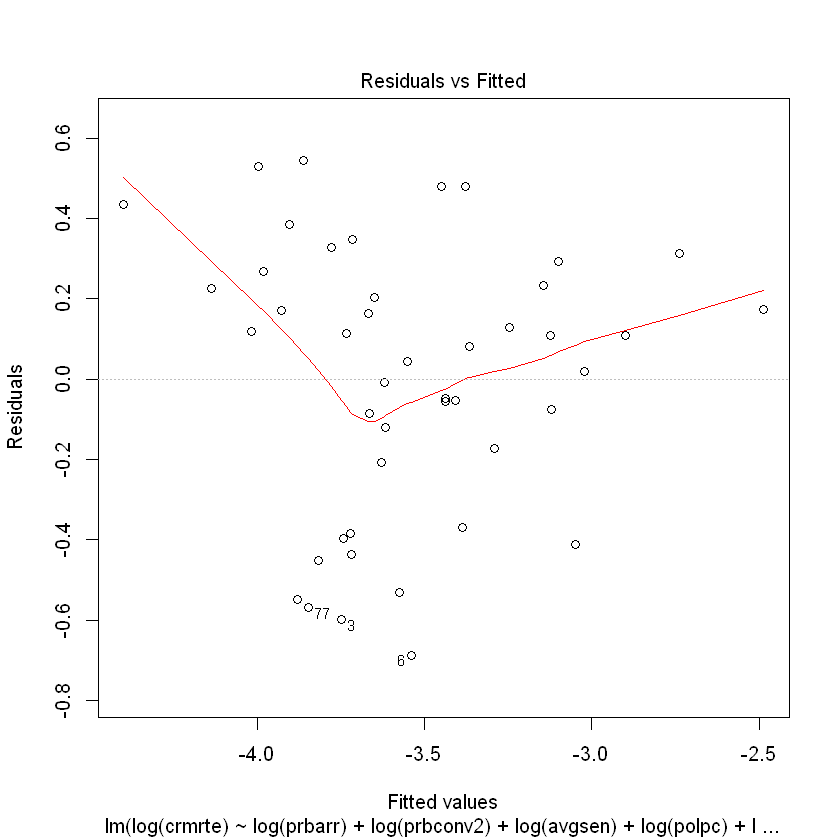

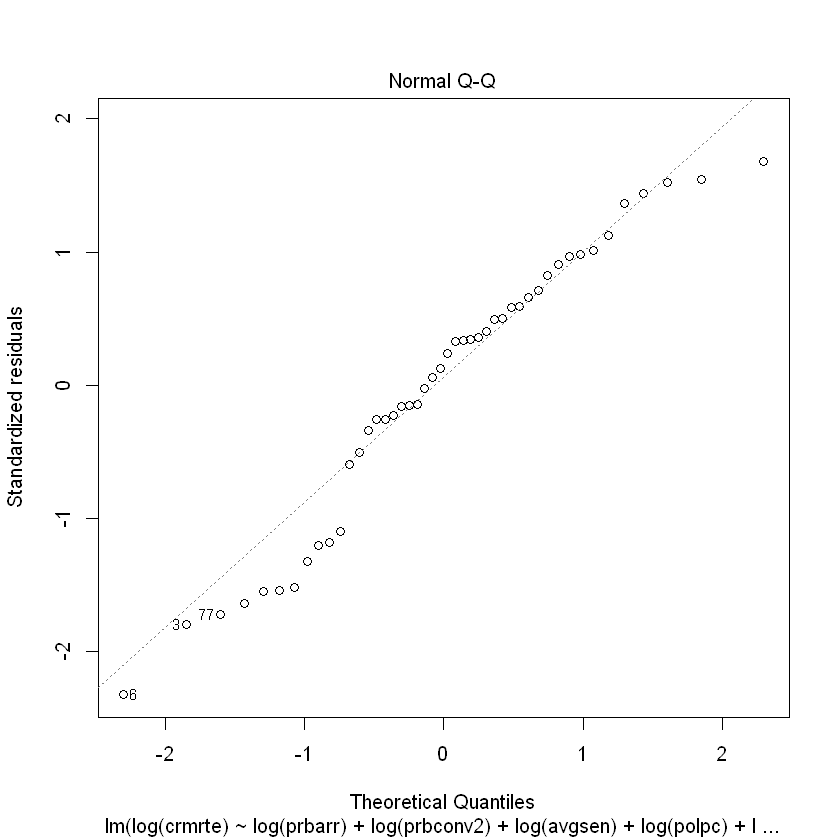

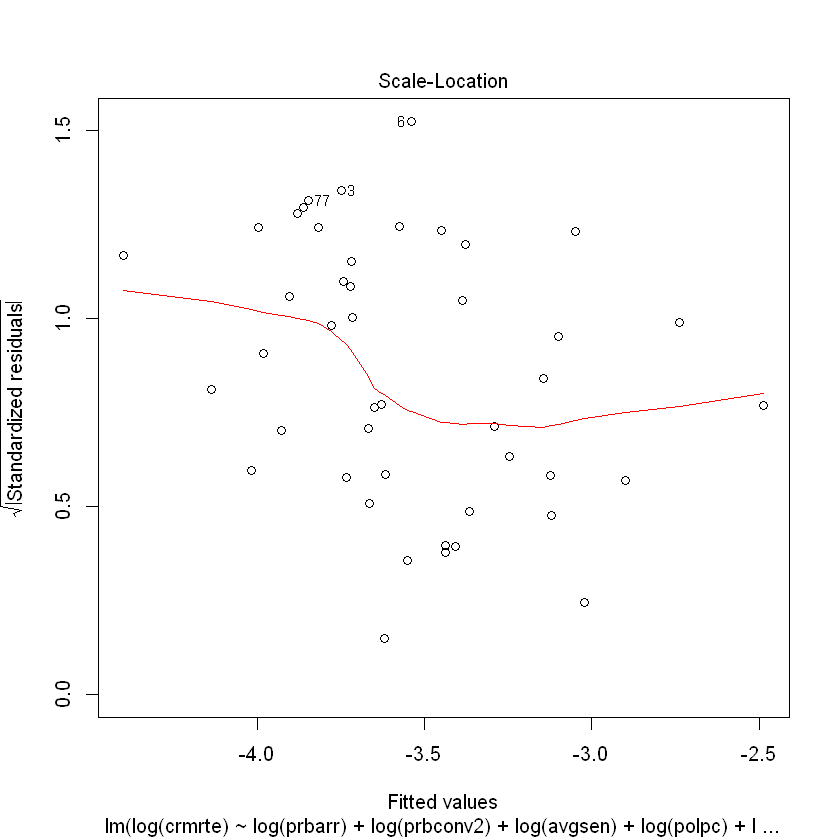

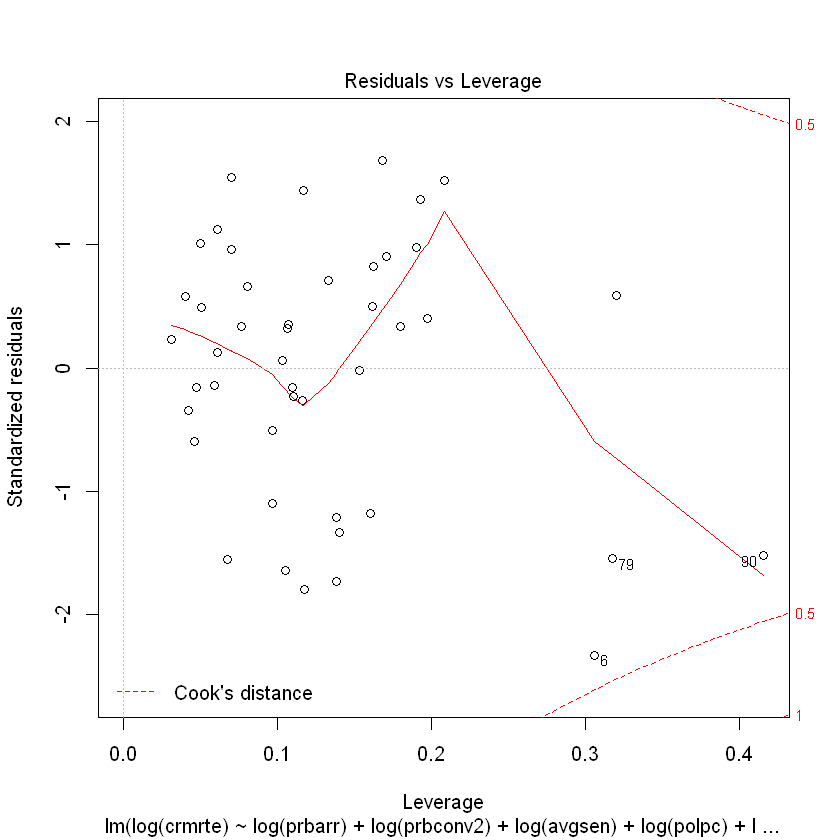


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.95647, p-value = 0.08354


ERROR: Error in coeftest(model2, vcov = vcovHC): could not find function "coeftest"


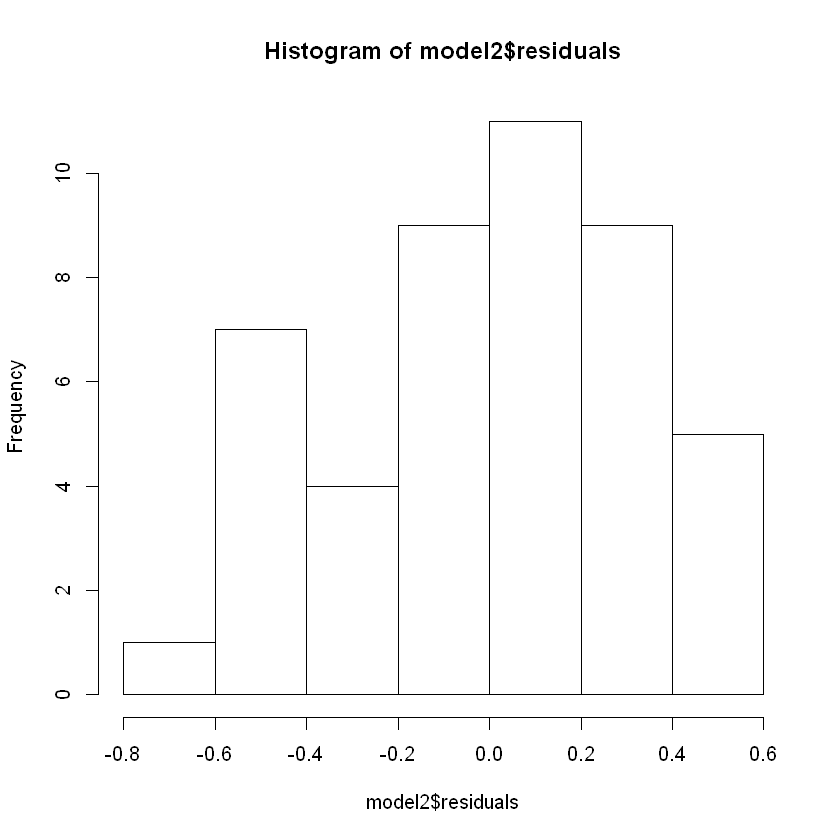

In [10]:
#Checking for CLM assumptions. 
plot(model2)
hist(model2$residuals)
shapiro.test(model2$residuals)
coeftest(model2, vcov = vcovHC)
vcovHC(model2)
# % increase in probability arrest is associated with 0.88% decline in crime rate.

##### Discussion of CLM Assumption analysis for Model 2
- Zero Conditional Mean: Looking at the Residuals vs. Fitted value, the values are centered fairly close to 0 throughout the x-value except at the extreme values of X.
- Homoskedasticity: We can also see in the Residuals vs Fitted value plot that the the variance is larger for smaller x-value, thus indicating heteroskedasticity. In addition, we can also reject the null hypothesis that the residuals is normally distributed by looking at the p-value < 0.05 in the Shapiro test.
- Normality of errors: Looking at the Normal Q-Q plot, our residuals do not closely follow the diagonal line entirely. This indicates that normality assumption of errors is also violated. Due to the size of our observation, we should note that we will not be able to rely on OLS asymptotic assumption and may need to consider correcting for this. 
- Leverage & Influence: Due to small sample size, many observations have high leverage. Also, we see that there is a single observation falling outside the 0.5 dotted line which signals potential for strong influence. 

## Regression Table

In [11]:
library('stargazer')

model1 = lm(log(crmrte) ~ log(prbarr)+ log(prbconv2) + log(avgsen), data = df)

stargazer(model1, model2, type = 'text', report = 'vc', title = "% Change in Crime Rate vs % Change in Prob of Arrest , % Change in Police per Capita, % Change in average sentence days & % Change in probability of conviction",
         keep.stat = c('n', 'rsq'), omit.table.layout = 'n')
#scatterplot(log(crmrte) ~ log(prbarr) + log(polpc) + log(avgsen) + log(prbconv2)), data = df, ylab = "% Change in Crime Rate", xlab = "% Change in Probability of Arrest and Average Sentence", main = "Regression Model 1:  
#% Change in Crime Rate vs % Change in Probability of Arrest and Average Sentence
#(Counties with Higher than Avg Face - To - Face Crimes)")


% Change in Crime Rate vs % Change in Prob of Arrest , % Change in Police per Capita, % Change in average sentence days & % Change in probability of conviction
              Dependent variable: 
              --------------------
                  log(crmrte)     
                 (1)        (2)   
----------------------------------
log(prbarr)     -0.983    -0.905  
                                  
log(prbconv2)   -0.231    -0.179  
                                  
log(avgsen)     -0.035    -0.058  
                                  
log(polpc)                 0.151  
                                  
log(taxpc)                 0.401  
                                  
Constant        -3.819    -4.320  
                                  
----------------------------------
Observations      46        46    
R2              0.507      0.560  


## Model 3 Analysis

In our model 3, we included below list of covariates in addition to the features included in our model 2 (1. probability of arrest, 2. police per capita, 3. average sentence days and 4. probability of conviction).
-  probability of prison (prbpris)
-  urban
-  percent young male (pctymle)
-  wage of local government employees (wloc)
-  tax per capita(taxpc) 

<br>
Model still demonstrates robustness in having a strong association of decline in crime rate based on increasing probability of arrests as shown by $\beta_1 \ = \ -.493$ . However increase in $R^2$ to 0.652 can be attributed to addition of 5 more covariates. With so many features included in our OLS model, the interpretability(parsimony) has been negatively impacted since we would have expected decline in crime rate with the increase in likelihood of conviction and prison sentence based on our initial assumption. 

In [15]:
#fitting the linear model of model3
(model3 = lm(log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen)+ log(polpc) + log(taxpc)+ log(density) + log(pctymle)+log(pctmin80), data = df))


summary(model3)$r.square

#(model5 = lm(crmrte ~  log(prbarr) + log(polpc) + log(avgsen)+ log(prbconv2) + log(prbpris)+ urban + log(pctymle) + log(wloc) + log(taxpc) , data = df))


Call:
lm(formula = log(crmrte) ~ log(prbarr) + log(prbconv2) + log(avgsen) + 
    log(polpc) + log(taxpc) + log(density) + log(pctymle) + log(pctmin80), 
    data = df)

Coefficients:
  (Intercept)    log(prbarr)  log(prbconv2)    log(avgsen)     log(polpc)  
      -1.4118        -0.6013        -0.1637        -0.2570         0.3792  
   log(taxpc)   log(density)   log(pctymle)  log(pctmin80)  
       0.1655         0.0951         0.2440         0.2563  


[1] 0.8202689

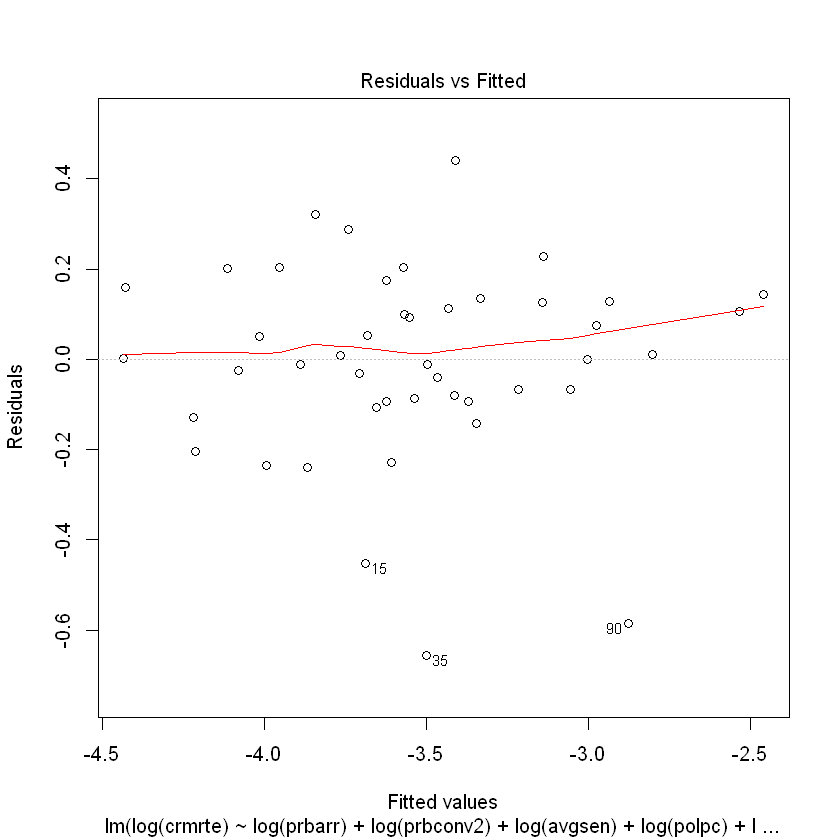

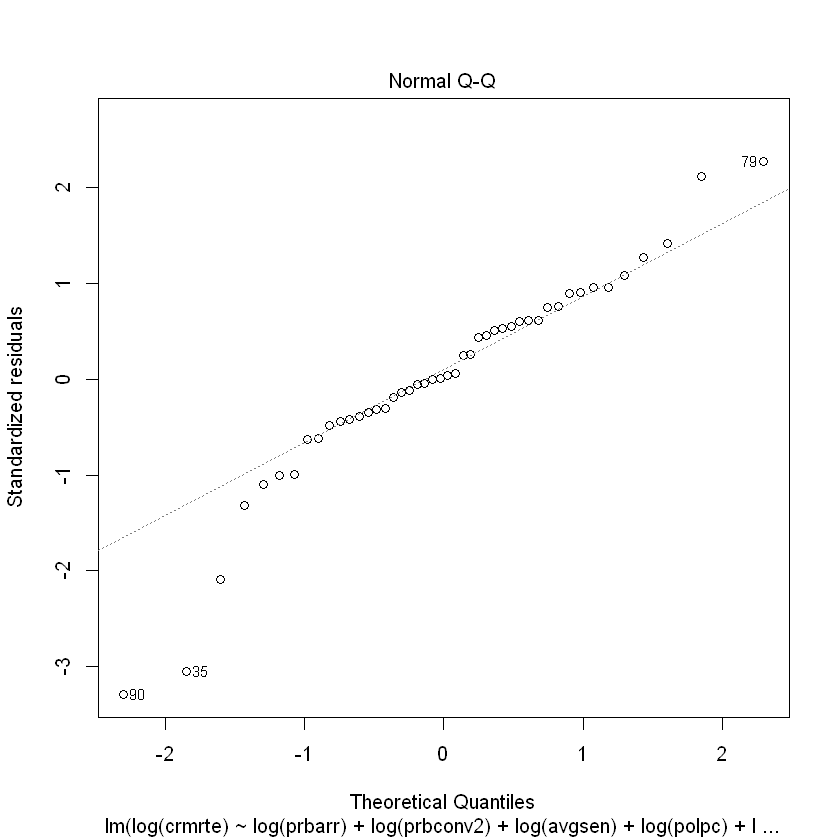

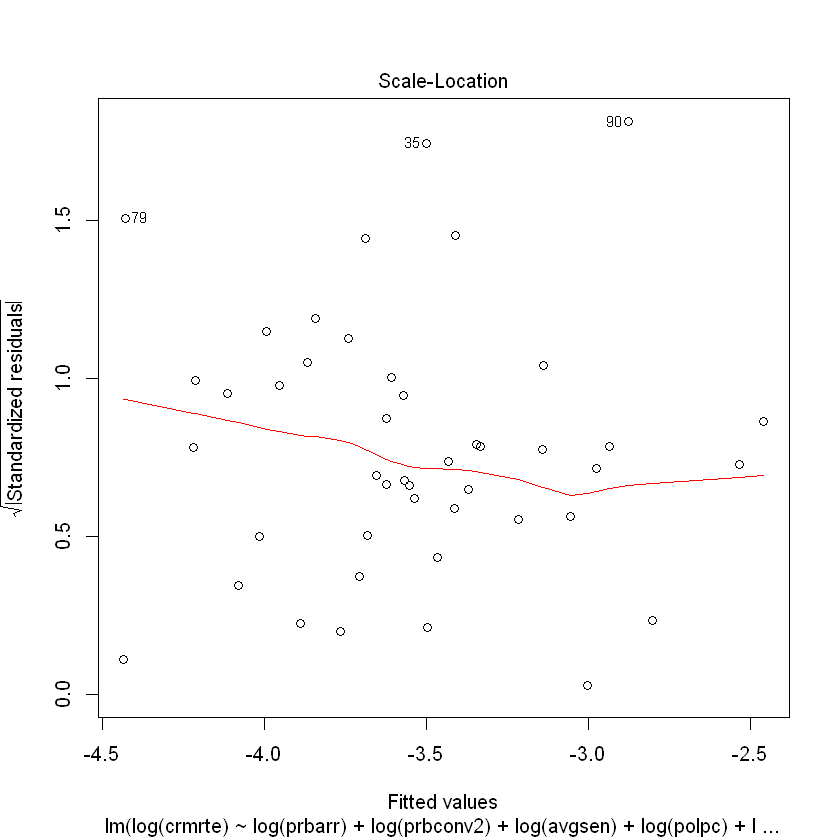

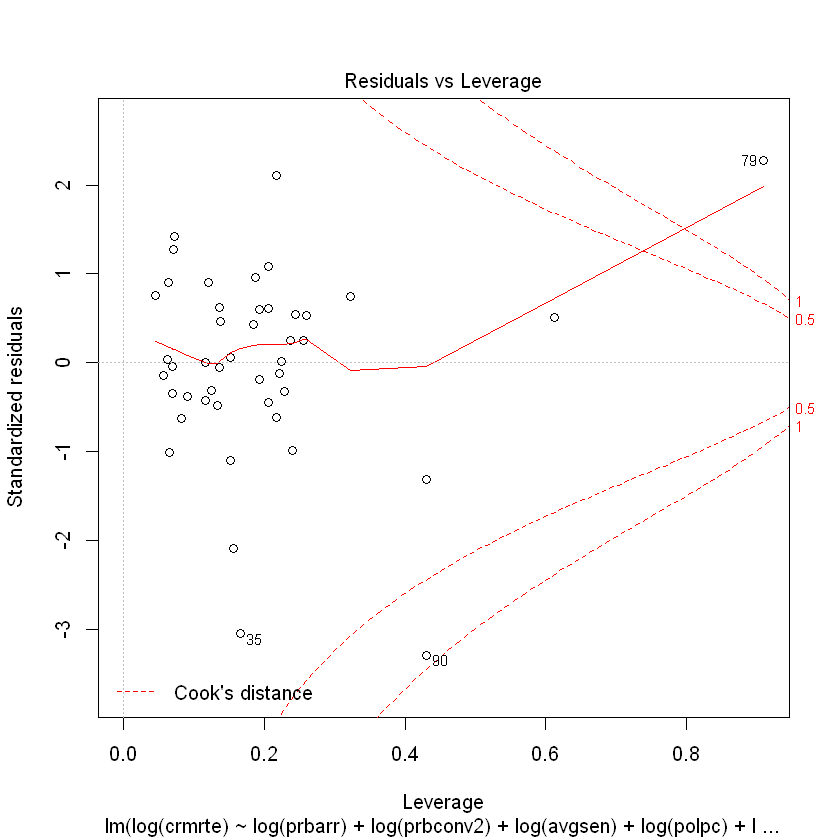


	Shapiro-Wilk normality test

data:  model4$residuals
W = 0.93579, p-value = 0.01367


ERROR: Error in coeftest(model3, vcov = vcovHC): could not find function "coeftest"


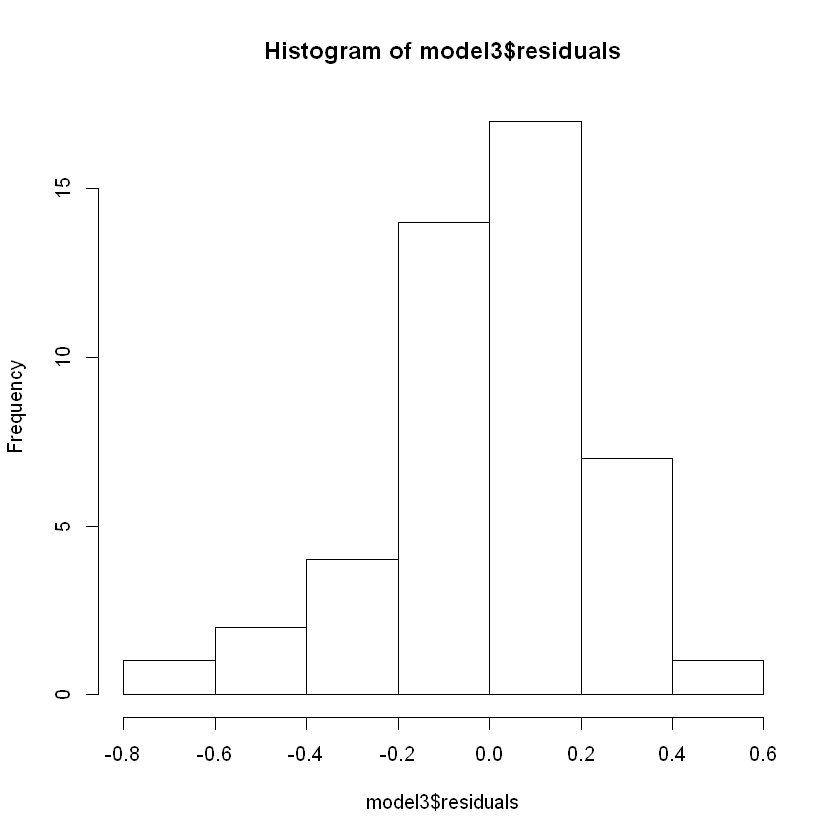

In [16]:
#Checking for CLM assumptions. 
plot(model3)
hist(model3$residuals)
shapiro.test(model4$residuals)
coeftest(model3, vcov = vcovHC)
vcovHC(model3)
# % increase in probability arrest is associated with 0.43% decline in crime rate.

##### Discussion of CLM Assumption analysis for Model 3
- Zero Conditional Mean: Looking at the Residuals vs. Fitted value, the values are centered fairly close to 0 throughout the x-value and doe not seem to violate the condition. 
- Homoskedasticity: We can also see in the Residuals vs Fitted value plot that the the variance is larger for smaller x-value, thus indicating heteroskedasticity. In addition, we can also reject the null hypothesis that the residuals is normally distributed by looking at the p-value < 0.05 in the Shapiro test.
- Normality of errors: Looking at the Normal Q-Q plot, our residuals do not closely follow the diagonal line entirely. This indicates that normality assumption of errors is also violated. Due to the size of our observation, we should note that we will not be able to rely on OLS asymptotic assumption and may need to consider correcting for this. 
- Leverage & Influence: Due to small sample size, many observations have high leverage. Also, we see that there is a single observation falling outside the 0.5 dotted line which signals potential for strong influence. 

In [19]:
library(stargazer)

stargazer(model1, model2, model3,type = 'text', report = 'vc', title = "Model comparison: % Change in Crime Rate", column.labels = c('Base Model', 'Model 2', 'Model 3'),
         dep.var.labels = '% Change in Crime Rate',  covariate.labels = c('probability of arrest', 'probability of conviction', 'average sentence days', 'police per capita', 
                                                                         'tax per capita', 'density', 'percent of young male', 'percent of minority' ), keep.stat = c('n', 'rsq',"adj.rsq"), omit.table.layout = 'n')

(se.model1 = sqrt(diag(vcovHC(model1))))
(se.model2 = sqrt(diag(vcovHC(model2))))
(se.model3 = sqrt(diag(vcovHC(model3))))



Model comparison: % Change in Crime Rate
                             Dependent variable:    
                          --------------------------
                            % Change in Crime Rate  
                          Base Model Model 2 Model 3
                             (1)       (2)     (3)  
----------------------------------------------------
probability of arrest       -0.983   -0.905  -0.601 
                                                    
probability of conviction   -0.231   -0.179  -0.164 
                                                    
average sentence days       -0.035   -0.058  -0.257 
                                                    
police per capita                     0.151   0.379 
                                                    
tax per capita                        0.401   0.165 
                                                    
density                                       0.095 
                                                    
perc

ERROR: Error in vcovHC(model1): could not find function "vcovHC"


Looking at the base model and model 2, we are able to see that increase in likelihood of getting caught and the severity of punishment are associated with negative % change in crime rate. However, introducing many other covariates in Model 3 with coefficients raises the question collinearity between the included features, and draws away from the insight and interpretability. 

## Omitted Variables Discussion

## 1. Unemployment

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*unemp + u \\
unemp = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 > 0$, $\delta_1 <0$, then $OVB = \beta_3\delta_1 <0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled away from zero (more negative), gaining statistical significance. 
-	Estimated direction: away from 0
-	Explanation for direction: If prbarr increases (i.e. more likely to be arrested), we expect unemp to decrease slightly because crime is now less profitable.
-	Size of bias: Unclear
-	Proxies: None in the data
-	Impact on whether effects are real: Including the omitted variable unemp would only strengthen the OLS coefficient for prbarr.

### Impact on polpc
If $\beta_3 > 0$, $\delta_2 <0$, then $OVB = \beta_3\delta_2 <0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled towards zero (less positive), losing statistical significance.
-	Estimated direction: towards 0
-	Explanation for direction: If polpc increases, we  expect unemp to decrease slightly, both because hiring more policemen reduces unemployment and because these additional policemen will increase demand for other services, which would create jobs.
-	Size of bias: Unclear
-	Proxies: None in the data
-	Impact on whether effects are real: Including the omitted variable unemp would weaken the OLS coefficient for polpc, casting doubt on its explanatory power.

## 2. Income inequality

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*ineq + u \\
ineq = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 > 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 >0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: If prbarr increases (i.e. more likely to be arrested), we expect inequality to increase because stricter criminal laws tend to be enacted in more unequal places.
-	Size of bias: Unclear
-	Proxies: Could take the difference between the highest and lowest sectoral wages.
-	Impact on whether effects are real: Including the omitted variable ineq would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on polpc
If $\beta_3 > 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 >0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled away from zero (more positive), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: If polpc increases, we  expect inequality to increase because we think higher police per capita tends to occur in places with more inequality.
-	Size of bias: Unclear
-	Proxies: Could take the difference between the highest and lowest sectoral wages.
-	Impact on whether effects are real: Including the omitted variable ineq would strengthen the OLS coefficient for polpc, increasing its effect size.

## 3. Immigration levels

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*immi + u \\
immi = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 > 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 >0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect prbarr to be positively associated with immi, possibly due to lower levels of social trust. 
-	Size of bias: Unclear
-	Proxies: Potentially the pctmin80 variable, or at a stretch the wser and wcon variables, assuming that most immigrants end up in the service and/or construction industries. Lower wages than average might indicate the presence of immigrants in those sectors. 
-	Impact on whether effects are real: Including the omitted variable ineq would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on polpc
If $\beta_3 > 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 >0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled away from zero (more positive), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: We expect polpc to be positively associated with immi, i.e. places with more immigrants may have more policemen in order to ensure public order and security (whether real or imagined). 
-	Size of bias: Unclear
-	Proxies: Potentially the pctmin80 variable, or at a stretch the wser and wcon variables, assuming that most immigrants end up in the service and/or construction industries. Lower wages than average might indicate the presence of immigrants in those sectors. 
-	Impact on whether effects are real: Including the omitted variable ineq would strengthen the OLS coefficient for polpc, increasing its effect size.

## 4. Alcohol and drug abuse levels

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*drug + u \\
drug = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 > 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 >0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect prbarr to be positively associated with drug - with more drug abuse, we expect that the prbarr variable increases. 
-	Size of bias: Unclear
-	Proxies: Potentially the pctymle variable, but only if we assume drug abuse rates among youth are constant across counties.
-	Impact on whether effects are real: Including the omitted variable drug would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on polpc
If $\beta_3 > 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 >0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled away from zero (more positive), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: We expect polpc to be positively associated with drug, i.e. counties with more drug abuse are likely to have more policemen in order to ensure public order and security (whether real or imagined). 
-	Size of bias: Unclear
-	Proxies: Potentially the pctymle variable, but only if we assume drug abuse rates among youth are constant across counties.
-	Impact on whether effects are real: Including the omitted variable drug would strengthen the OLS coefficient for polpc, increasing its effect size.

## 5. Poverty

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*poor + u \\
poor = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 > 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 >0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect prbarr to be positively associated with poor - because of beliefs that poor people are likelier to commit crime, the poor variable increases when prbarr increases.
-	Size of bias: Unclear
-	Proxies: The taxpc variable may give an indicator of the poverty levels in a county.
-	Impact on whether effects are real: Including the omitted variable drug would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on polpc
If $\beta_3 > 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 >0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled away from zero (more positive), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: We expect polpc to be positively associated with poor, i.e. counties with more poor people are likely to have more policemen in order to ensure public order and security (whether real or imagined). 
-	Size of bias: Unclear
-	Proxies: The taxpc variable may give an indicator of the poverty levels in a county.
-	Impact on whether effects are real: Including the omitted variable poor would strengthen the OLS coefficient for polpc, increasing its effect size.

## 6. Parental criminality

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*prtcrm + u \\
prtcrm = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 > 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 >0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect prbarr to be positively associated with prtcrm. Parents with criminal records are likelier to have children who commit crimes. Consequently, as prbarr increases, we expect prtcrm to increase too. 
-	Size of bias: Unclear
-	Proxies: None in this data set.
-	Impact on whether effects are real: Including the omitted variable prtcrm would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on polpc
If $\beta_3 > 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 >0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled away from zero (more positive), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: We expect polpc to be positively associated with prtcrm, i.e. counties with more parents who have criminal records are likely to have more policemen in order to ensure public order and security (whether real or imagined). 
-	Size of bias: Unclear
-	Proxies: None in this data set.
-	Impact on whether effects are real: Including the omitted variable prtcrm would strengthen the OLS coefficient for polpc, increasing its effect size.

## 7. Quality of parenting/dysfunctional family background

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*dysfunc + u \\
dysfunc = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 > 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 >0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect prbarr to be positively associated with dysfunc. Individuals from dysfunctional families are likelier to commit crimes. Consequently, as prbarr increases, we expect dysfunc to increase too. 
-	Size of bias: Unclear
-	Proxies: None in this data set.
-	Impact on whether effects are real: Including the omitted variable dysfunc would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on polpc
If $\beta_3 > 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 >0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled away from zero (more positive), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: We expect polpc to be positively associated with dysfunc, i.e. counties with more dysfunctional families are more likely to have more policemen in order to ensure public order and security (whether real or imagined). 
-	Size of bias: Unclear
-	Proxies: None in this data set.
-	Impact on whether effects are real: Including the omitted variable dysfunc would strengthen the OLS coefficient for polpc, increasing its effect size.

## 8. Education

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*educ + u \\
educ = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 < 0$, $\delta_1 <0$, then $OVB = \beta_3\delta_1 >0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled  towards zero (less negative), losing statistical significance. 
-	Estimated direction: towards 0
-	Explanation for direction: We expect prbarr to be negatively associated with educ. In more educated counties, the prbarr is probably lower. However, we also expect educ to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a positive product.
-	Size of bias: Unclear
-	Proxies: Perhaps the urban variable, because urban populations tend to be more educated than their non-urban counterparts. Or the wfir variable, assuming that finding employment in finance, insurance and real estate may require more education than the other sectors.
-	Impact on whether effects are real: Including the omitted variable educ would weaken the OLS coefficient for prbarr, indicating that its effects may not be that strong or real.

### Impact on polpc
If $\beta_3 < 0$, $\delta_2 <0$, then $OVB = \beta_3\delta_2 >0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled away from zero (more positive), gaining statistical significance.
-	Estimated direction: away from 0
-	Explanation for direction: We expect polpc to be negatively associated with educ. In more educated counties, the polpc is probably lower. However, we also expect educ to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a positive value. 
-	Size of bias: Unclear
-	Proxies: None in this data set.
-	Impact on whether effects are real: Including the omitted variable educ would strengthen the OLS coefficient for polpc, increasing its effect size.

## 9. Protections for women

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*protec + u \\
protec = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 < 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 <0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled away from zero (more negative), increasing statistical significance. 
-	Estimated direction: away from 0
-	Explanation for direction: We expect prbarr to be positively associated with protec. We think that counties with stronger protections for women will take a tougher stance against crimes, and thus have larger prbarr. However, we also expect protec to reduce the crmrte variable. Hence, we end up with a negative OVB.
-	Size of bias: Unclear
-	Proxies: None in this data set.
-	Impact on whether effects are real: Including the omitted variable protec would strengthen the OLS coefficient for prbarr, increasing its effect size.

### Impact on polpc
If $\beta_3 < 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 <0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled towards zero (less positive), losing statistical significance.
-	Estimated direction: towards 0
-	Explanation for direction: We expect polpc to be positively associated with protec. Counties with more security forces and thus a stronger stance against crime are likely to have protections for women too. However, we also expect protec to reduce the crmrte variable. Hence, when we take their product to calculate the OVB, we end up with a negative value. 
-	Size of bias: Unclear
-	Proxies: None in this data set.
-	Impact on whether effects are real: Including the omitted variable protec would weaken the OLS coefficient for polpc, indicating its effect size may be weaker or not real.

## 10. Investment in social services

> $ 
crmrte = \beta_0 + \beta_1* prbarr + \beta_2*polpc + \beta_3*invest + u \\
invest = \delta_0 + \delta_1*prbarr + \delta_2*polpc + v \\
$

> $
\text{Substituting into original equation:} \\
\begin{align}
crmrte &= \beta_0 + \beta_1 * prbarr + \beta_2 * polpc + \beta_3 * (\delta_0 + \delta_1*prbarr + \delta_2 * polpc +v) + u \\
&= (\beta_0 + \beta_3*\delta_0) + (\beta_1 + \beta_3*\delta_1)prbarr + (\beta_2 + \beta_3*\delta_2)polpc + (\beta_3*v +u)
\end{align}
$

### Impact on prbarr
If $\beta_3 < 0$, $\delta_1 >0$, then $OVB = \beta_3\delta_1 <0$ and if $\beta_1<0$ then the OLS coefficient on $prbarr$ will be scaled away from zero (more negative), increasing statistical significance. 
-	Estimated direction: away from 0
-	Explanation for direction: We expect prbarr to be positively associated with invest. We think that counties with larger prbarr, which indicates their commitment to tackling crime, are likely to have both the commitment and resources for increased social services spending. However, we also expect protec to reduce the crmrte variable. Hence, we end up with a negative OVB.
-	Size of bias: Unclear
-	Proxies: taxpc and polpc variables, which indicate the relative amounts of resources that each county has.
-	Impact on whether effects are real: Including the omitted variable invest would strengthen the OLS coefficient for prbarr, increasing its effect size.

### Impact on polpc
If $\beta_3 < 0$, $\delta_2 >0$, then $OVB = \beta_3\delta_2 <0$ and if $\beta_2>0$ then the OLS coefficient on $polpc$ will be scaled towards zero (less positive), losing statistical significance.
-	Estimated direction: towards 0
-	Explanation for direction: We expect polpc to be positively associated with invest. Counties with more security forces are more likely to have more resources than other counties for social services spending. However, we also expect invest to reduce the crmrte variable, by preventing crime and reducing recidivism. Hence, when we take their product to calculate the OVB, we end up with a negative value. 
-	Size of bias: Unclear
-	Proxies: taxpc and polpc variables, which indicate the relative amounts of resources that each county has.
-	Impact on whether effects are real: Including the omitted variable protec would weaken the OLS coefficient for polpc, indicating its effect size may be weaker or not real.

## Inference and CLM Assumptions
 We will use Model 1 to test whether our 6 assumptions hold.  Those are:
1.  Linear population model
2.  Random Sampling
3.  No perfect multicollinearity
3.  Zero-conditional mean
4.  Homoskedasticity
5.  Normality of Errors

# 1 Linear Population Model
Since we do not constrain the error term, we can by inspection of the results of the model know that there is some linear relationship between the variables.

# 2 Random Sampling
Based on the background the study we accept the data to be a random sampling.  

# 3 No perfect muticolinearity
R has not alerted us to any perfect colinearity and so this assumptions holds.

# 4 Zero-Conditional Mean
We will use the Residuals vs Fitted plot to analyze if our model has a straight line about 0.

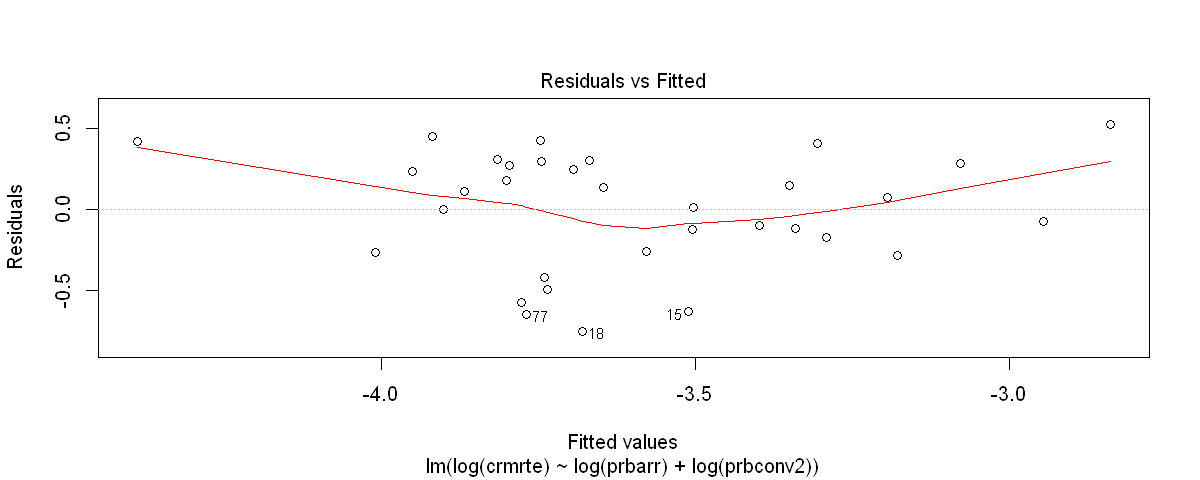

In [23]:
plot(model1, which =1)

The zero conditional mean does not hold implicity.  We can move to the lesser assumption of $cov(X, u)$ or $E(x,u) \ = \ E(x)E(u) \ = \ 0$ which is at least consistent as $n \rightarrow \ \infty$

# 5 Homoskedacity

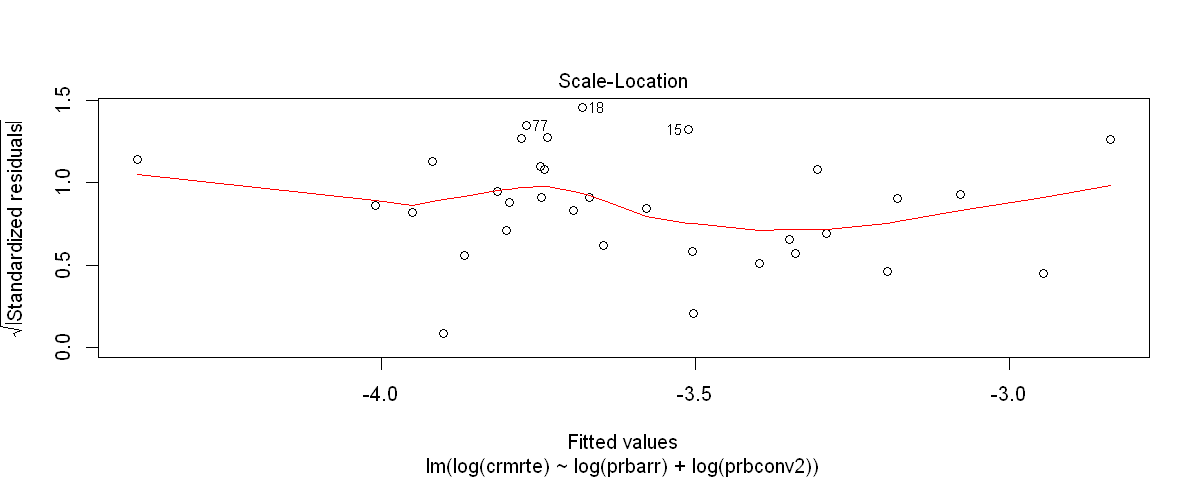

In [26]:
plot(model1, which =3)

This graph implies homoskedacity and so we will use robust erros to account for homoskedacity

# 6 Normalized Error

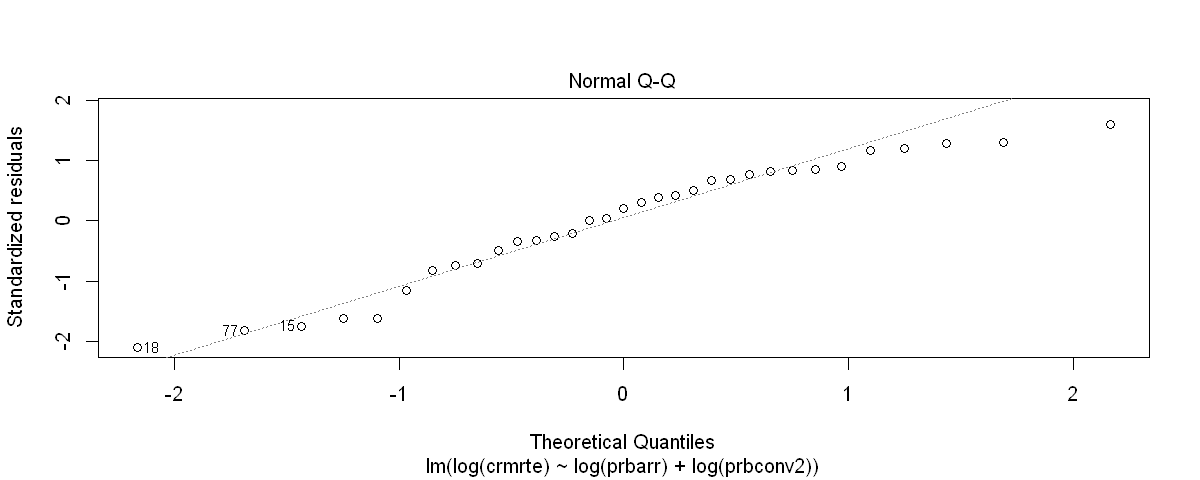

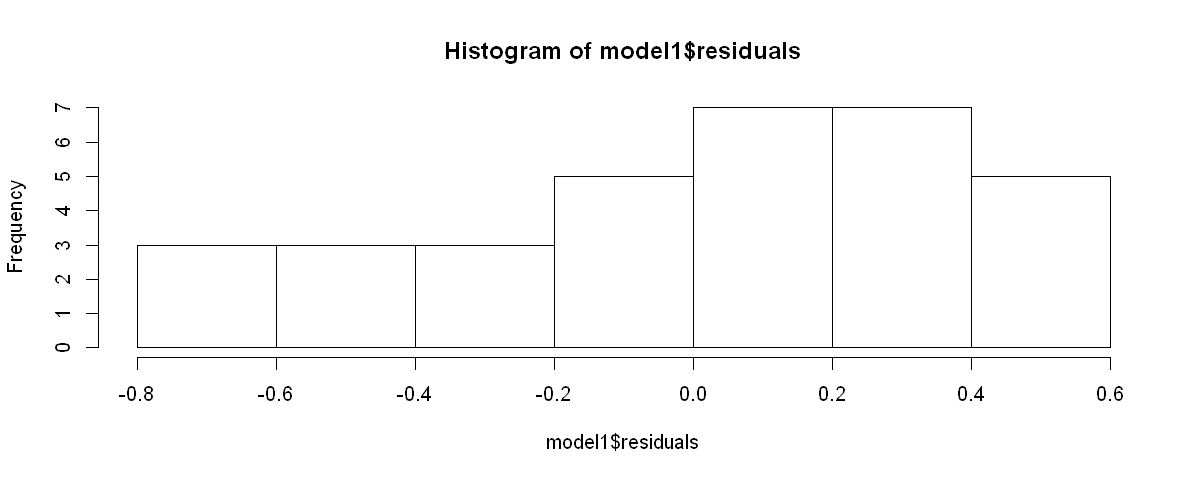

In [29]:
plot(model1, which = 2)
hist(model1$residuals)

The errors do not have a normal distribution bades on the QQ plot.  An inspection of the histogram of the residuals does not appear to show any skews.  Since the n > 30 we will rely on the Central Limit Theorem to accept normality of our error term.  

# Coefficients test with robust standard errors
Since we recognized from our test of CLM #4 regarding heteroskedactiy that we do not have heterskedacity we can use a robust erros for our coefficients.  Here is model 1 with robust standard errors:

In [20]:

coeftest(model1, vcov = vcovHC)

Loading required package: carData
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   -3.819242   0.711498 -5.3679 3.201e-06 ***
log(prbarr)   -0.982611   0.176669 -5.5619 1.691e-06 ***
log(prbconv2) -0.230911   0.099608 -2.3182   0.02538 *  
log(avgsen)   -0.034755   0.250186 -0.1389   0.89018    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## Conclusion

The popular catch-phrase from the 1960's and 1970's "Don't do the crime if you can't do the time" certainly rings true even today. The key to lowering crime rate in North Carolina is to reinforce the connection between actions and consequences, especially in those areas that have a high rate of face to face crimes.  Our campaign is rooted in the mission of reducing the crime that matters. We are going to empower our police officers to form stronger bonds with the community and tap into their network to find those responsible for committing heinous, face to face crimes. Along with increasing the probability of arrest for those who commit crimes, we are also going to harshen the punishments for individuals that are repeat offenders.  We are confident that increasing the average sentence on criminals who continue to commit crimes after they have already been caught will help to deter them from choosing to break the law after they have already been caught once. Keeping North Carolina safe starts with empowering those who are charged with protecting us to find those responsible for crimes, and allowing them to implement a punishment structure that will deter citizens from breaking the law.
